# Multiple-choice question

# 1. Install Litelines

In [1]:
%pip install --quiet --upgrade litelines

## 2. Download a model and its tokenizer

In [2]:
# Use cuda for faster inference
import torch

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
assert device == torch.device("cuda"), "In the Runtime tab, please Change runtime type to GPU"

In [3]:
from transformers import AutoModelForCausalLM, AutoTokenizer

MODEL_ID = "Qwen/Qwen2.5-0.5B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(MODEL_ID)
model = AutoModelForCausalLM.from_pretrained(MODEL_ID).to(device)

## 3. Prepare the inputs to the LLM

In [4]:
user_input = """Which key combination exits Vim?

A) Ctrl+X
B) Esc then :q!
C) Alt+F4
"""
messages = [{"role": "user", "content": user_input}]
inputs = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt=True,
    return_tensors="pt",
    return_dict=True
).to(model.device)

## 4. Define a processor through a regular expression

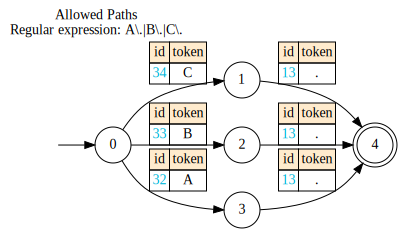

In [5]:
from litelines.transformers import SchemaProcessor

processor = SchemaProcessor(response_format=r"A\.|B\.|C\.", tokenizer=tokenizer)
processor.show_graph()

## 5. Generate a structured response

In [6]:
generated = model.generate(**inputs, logits_processor=[processor], temperature=0.1)
print(f"Response: {tokenizer.decode(generated[0][inputs['input_ids'].shape[-1]:-1])}")

Response: B.


## 6. Visualize the selected path

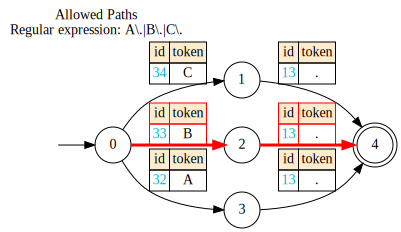

In [7]:
processor.show_graph()